## Data Loadout

Import all the libraries we will use for this project.  
Load in the data into a numpy array.  
Data: https://www.kaggle.com/datasnaek/league-of-legends

In [9]:
import sklearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Read data from csv to numpy array
lol_df = pd.read_csv('games.csv')
lol_df2 = lol_df[['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_data = np.array(lol_df2)
print(lol_data)

[[1949    0    2 ...    0    1    1]
 [1851    0    1 ...    0    0    0]
 [1493    0    2 ...    0    1    0]
 ...
 [2156    1    2 ...    0    2    0]
 [1475    1    2 ...    0    1    0]
 [1445    0    1 ...    0    1    0]]


## Logistic Regression

Implementing logostic regression using the data.

### Sigmoid Function and Gradient Ascent

Implementing logistic regression using a sigmoid function for the activation function and using gradient ascent.

Training Accuracy:  0.9604231356244408
Testing Accuracy:  0.9611888388269701


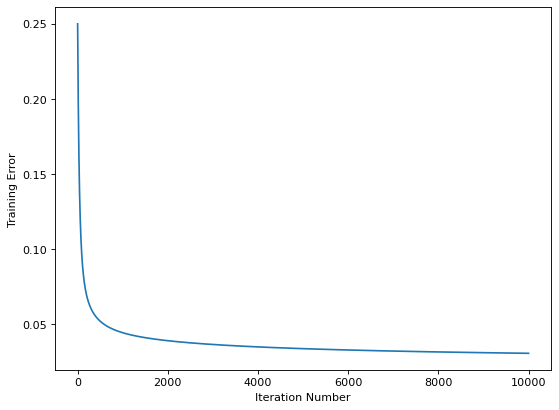

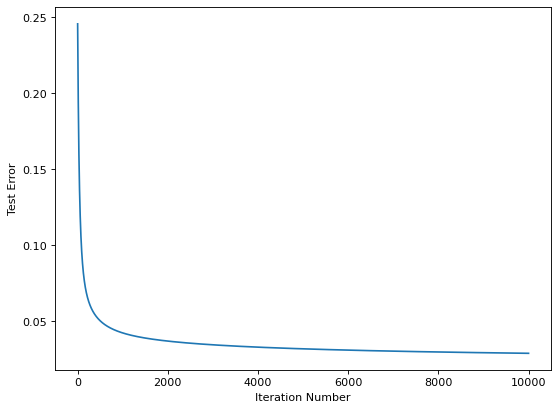

In [10]:
# Setting the X and Y matrices
lol_X = lol_df2[['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']]
lol_X = np.array(lol_X)
lol_Y = lol_df2[['winner']]
lol_Y = np.array(lol_Y)

# Scaling and splitting the data 75% training set, 25% testing set
lol_X_scale = preprocessing.scale(lol_X)
X_train, X_test, y_train, y_test = train_test_split(lol_X_scale, lol_Y, test_size = 0.25, train_size = 0.75, random_state = 42)
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0], 1)

# Sigmoid function
def sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

# Appending column of 1's to X
ones = np.ones((X_train.shape[0], 1))
X_train_1 = np.hstack((ones, X_train))
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))

# Initialize w to 0
w_init = np.zeros((X_train_1.shape[1], 1))

# Hypothesis function
def hypothesis(X_train_1, w):
    y_hat = sigmoid(np.dot(X_train_1, w))
    return y_hat

y_hat_init = hypothesis(X_train_1, w_init)

# Gradient ascent
def Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters):
    N = X_train_1.shape[0]
    train_errors_list = []
    test_errors_list = []
    w = np.zeros((X_train_1.shape[1], 1))
    for i in range(num_iters):
        y_hat = hypothesis(X_train_1, w)
        error = y_2d_train - y_hat
        gradient = np.dot(np.transpose(X_train_1), error)
        # Updating Parameters
        w = w + (learning_rate / N) * gradient
        train_errors_list.append(np.mean((y_2d_train - y_hat) ** 2))
        test_errors_list.append(np.mean((y_2d_test - hypothesis(X_test_1, w)) ** 2))
    
    return w, train_errors_list, test_errors_list

# Precision_recall
def precision_recall(y_hat, y, threshold):  
    y_hat_binary = np.copy(y_hat)
    for i in range(y_hat_binary.shape[0]):
        if y_hat_binary[i] < threshold:
            y_hat_binary[i] = 0
        else:
            y_hat_binary[i] = 1

    false_difference = y - y_hat_binary
    false_pos = np.sum(false_difference < 0)
    false_neg = np.sum(false_difference > 0)

    all_trues = np.ones((y.shape[0], 1)) 
    true_difference = all_trues - (y_hat_binary + y)
    true_pos = np.sum(true_difference < 0)

    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    return precision,recall

# F1 score
def f_score(precision, recall):
    score = 2 * ((precision * recall) / (precision + recall))
    return score

# Predict
def predict(X_train_1, w):
    y_hat = hypothesis(X_train_1,w)
    return y_hat

# Running logistic regression gradient ascent
learning_rate = 0.01
num_iters = 10000
w, train_errors_list, test_errors_list = Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters)

# Determine training accuracy
y_hat = predict(X_train_1, w)
precision_train, recall_train = precision_recall(y_hat, y_2d_train, 0.5)
f_score_train = f_score(precision_train, recall_train)

print("Training Accuracy: ", f_score_train)

# Determine testing accuracy
y_hat_test = predict(X_test_1, w)
precision_test, recall_test = precision_recall(y_hat_test, y_2d_test, 0.5)
f_score_test = f_score(precision_test, recall_test)

print("Testing Accuracy: ", f_score_test)

# Plotting training error over each iteration
figure(figsize=(8, 6), dpi=80)
plt.plot(train_errors_list)
plt.xlabel('Iteration Number')
plt.ylabel('Training Error')
plt.show()

# Plotting testing error over each iteration
figure(figsize=(8, 6), dpi=80)
plt.plot(test_errors_list)
plt.xlabel('Iteration Number')
plt.ylabel('Test Error')
plt.show()

### SkLearn Library L1 Regularization

Implementing logistic regression using sklearn's library and L1 regularization.

C value = 0.000001
Accuracy on training data = 0.505995
Accuracy on test data = 0.507807


C value = 0.000010
Accuracy on training data = 0.505995
Accuracy on test data = 0.507807


C value = 0.000100
Accuracy on training data = 0.957169
Accuracy on test data = 0.958518


C value = 0.001000
Accuracy on training data = 0.957195
Accuracy on test data = 0.958906


C value = 0.010000
Accuracy on training data = 0.958878
Accuracy on test data = 0.962480


C value = 0.100000
Accuracy on training data = 0.960820
Accuracy on test data = 0.962557


C value = 1.000000
Accuracy on training data = 0.963021
Accuracy on test data = 0.963256


C value = 10.000000
Accuracy on training data = 0.963021
Accuracy on test data = 0.963179




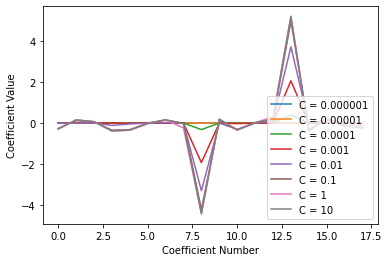

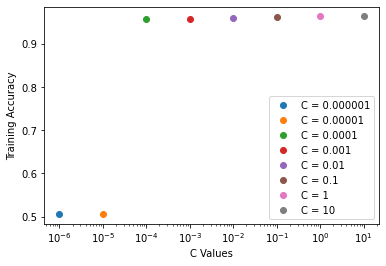

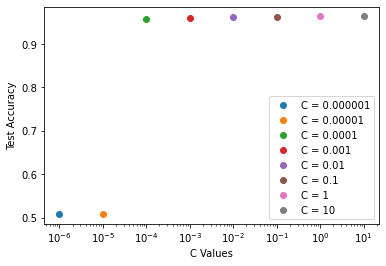

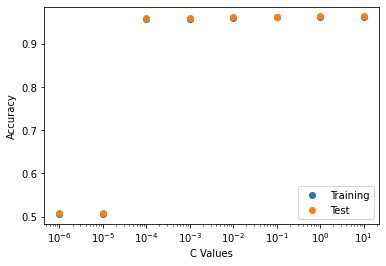

In [11]:
c_vals = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
acc_logreg_train_vals = []
acc_logreg_test_vals = []

# Logistic regression model with L1 regularization
def logreg_model_l1(cVals, xtrain, ytrain, xtest, ytest, acc_train_vals, acc_test_vals):
    for i in cVals:
        logreg = LogisticRegression(solver='liblinear', C=i, penalty='l1')
        print("C value = %f" % i)
        logreg.fit(xtrain, ytrain)

        y_hat_logreg_train = logreg.predict(xtrain)
        acc_logreg_train = logreg.score(xtrain, ytrain)
        acc_train_vals.append(acc_logreg_train)
        print("Accuracy on training data = %f" % acc_logreg_train)

        y_hat_logreg_test = logreg.predict(xtest)
        acc_logreg_test = logreg.score(xtest, ytest)
        acc_test_vals.append(acc_logreg_test)
        print("Accuracy on test data = %f" % acc_logreg_test)
        print("\n")

        w_logreg = logreg.coef_
        intercept_logreg = logreg.intercept_
        coeffs_logreg = np.concatenate([intercept_logreg, w_logreg.flatten()])

        # Plotting the coefficient weights
        plt.plot(coeffs_logreg.flatten())
        plt.xlabel('Coefficient Number')
        plt.ylabel('Coefficient Value')
        plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
    plt.show()
    
logreg_model_l1(c_vals, X_train, y_2d_train.ravel(), X_test, y_2d_test.ravel(), acc_logreg_train_vals, acc_logreg_test_vals)

# Separate test/train accuracy plots
for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_train_vals[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Training Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_test_vals[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

# Combined test/train accuracy plots
plt.plot(c_vals, acc_logreg_train_vals, 'o')

plt.plot(c_vals, acc_logreg_test_vals, 'o')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

### SkLearn Library L2 Regularization

Implementing logistic regression using sklearn's library and L2 regularization.

C value = 0.000001
Accuracy on training data = 0.920942
Accuracy on test data = 0.923017


C value = 0.000010
Accuracy on training data = 0.925836
Accuracy on test data = 0.928066


C value = 0.000100
Accuracy on training data = 0.940311
Accuracy on test data = 0.942360


C value = 0.001000
Accuracy on training data = 0.954191
Accuracy on test data = 0.955566


C value = 0.010000
Accuracy on training data = 0.962685
Accuracy on test data = 0.963412


C value = 0.100000
Accuracy on training data = 0.963073
Accuracy on test data = 0.962946


C value = 1.000000
Accuracy on training data = 0.963021
Accuracy on test data = 0.963256


C value = 10.000000
Accuracy on training data = 0.962996
Accuracy on test data = 0.963334




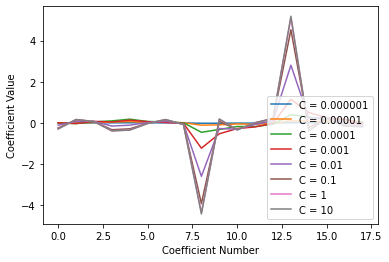

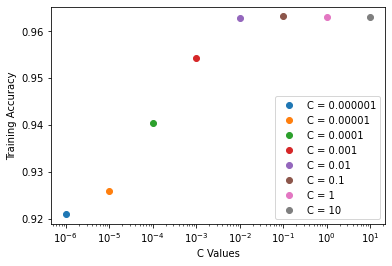

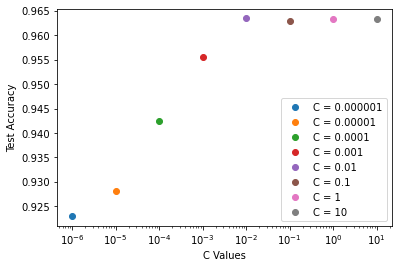

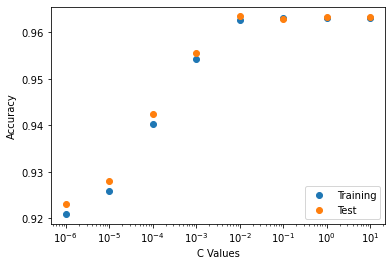

In [12]:
c_vals = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
acc_logreg_train_vals_l2 = []
acc_logreg_test_vals_l2 = []

# Logistic regression model with L2 regularization
def logreg_model_l2(cVals, xtrain, ytrain, xtest, ytest, acc_train_vals, acc_test_vals):
    for i in cVals:
        logreg_l2 = LogisticRegression(solver='liblinear', C=i, penalty='l2')
        print("C value = %f" % i)
        logreg_l2.fit(xtrain, ytrain)

        y_hat_l2 = logreg_l2.predict(xtrain)
        acc_logreg_l2_train = logreg_l2.score(xtrain, ytrain)
        acc_train_vals.append(acc_logreg_l2_train)
        print("Accuracy on training data = %f" % acc_logreg_l2_train)

        y_hat_l2 = logreg_l2.predict(xtest)
        acc_logreg_l2_test = logreg_l2.score(xtest, ytest)
        acc_test_vals.append(acc_logreg_l2_test)
        print("Accuracy on test data = %f" % acc_logreg_l2_test)
        print("\n")

        w_logreg_l2 = logreg_l2.coef_
        intercept_logreg_l2 = logreg_l2.intercept_
        coeffs_logreg_l2 = np.concatenate([intercept_logreg_l2, w_logreg_l2.flatten()])

        # Plotting the coefficient weights
        plt.plot(coeffs_logreg_l2.flatten())
        plt.xlabel('Coefficient Number')
        plt.ylabel('Coefficient Value')
        plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
    plt.show()
    
logreg_model_l2(c_vals, X_train, y_2d_train.ravel(), X_test, y_2d_test.ravel(), acc_logreg_train_vals_l2, acc_logreg_test_vals_l2)

# Separate test/train accuracy plots
for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_train_vals_l2[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Training Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_test_vals_l2[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

# Combined test/train accuracy plots
plt.plot(c_vals, acc_logreg_train_vals_l2, 'o')

plt.plot(c_vals, acc_logreg_test_vals_l2, 'o')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

### Polynomial Feature Transformation of Degree 2 with L1 Regularization

Perform a polynomial feature transformation of degree 2.  
Implement logistic regression using sklearn's library with L1 regularization.

C value = 0.000001
Accuracy on training data = 0.505995
Accuracy on test data = 0.507807


C value = 0.000010
Accuracy on training data = 0.505995
Accuracy on test data = 0.507807


C value = 0.000100
Accuracy on training data = 0.957169
Accuracy on test data = 0.958518


C value = 0.001000
Accuracy on training data = 0.957195
Accuracy on test data = 0.958906


C value = 0.010000
Accuracy on training data = 0.967424
Accuracy on test data = 0.964499


C value = 0.100000
Accuracy on training data = 0.970686
Accuracy on test data = 0.967218


C value = 1.000000
Accuracy on training data = 0.971489
Accuracy on test data = 0.966364


C value = 10.000000
Accuracy on training data = 0.971567
Accuracy on test data = 0.965820




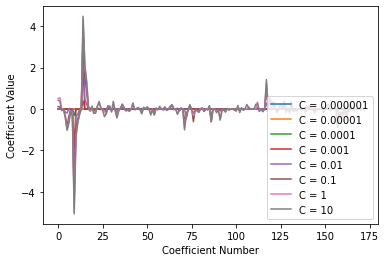

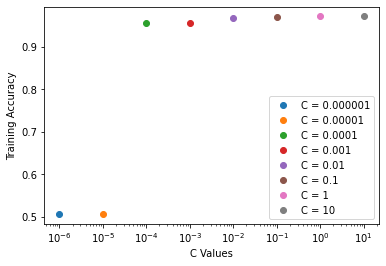

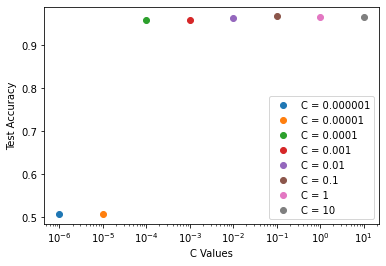

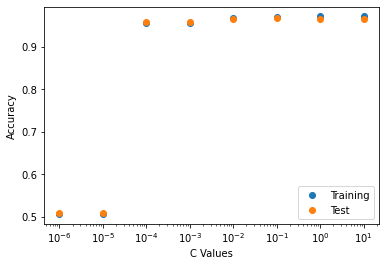

In [13]:
# Polynomial feature tranformation of degree 2
polyDeg2 = PolynomialFeatures(2)
X_transformed_train = polyDeg2.fit_transform(X_train)
X_transformed_test = polyDeg2.fit_transform(X_test)

acc_logreg_polyDeg2_train = []
acc_logreg_polyDeg2_test = []

logreg_model_l1(c_vals, X_transformed_train, y_2d_train.ravel(), X_transformed_test, y_2d_test.ravel(), acc_logreg_polyDeg2_train, acc_logreg_polyDeg2_test)

# Separate test/train accuracy plots
for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_polyDeg2_train[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Training Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_polyDeg2_test[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

# Combined test/train accuracy plots
plt.plot(c_vals, acc_logreg_polyDeg2_train, 'o')

plt.plot(c_vals, acc_logreg_polyDeg2_test, 'o')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

### Polynomial Feature Transformation of Degree 2 with L2 Regularization

Use the polynomial feature transformation of degree 2.  
Implement logistic regression using sklearn's library with L2 regularization.

C value = 0.000001
Accuracy on training data = 0.909107
Accuracy on test data = 0.911598


C value = 0.000010
Accuracy on training data = 0.923816
Accuracy on test data = 0.927600


C value = 0.000100
Accuracy on training data = 0.943056
Accuracy on test data = 0.944457


C value = 0.001000
Accuracy on training data = 0.960510
Accuracy on test data = 0.959994


C value = 0.010000
Accuracy on training data = 0.968226
Accuracy on test data = 0.965354


C value = 0.100000
Accuracy on training data = 0.971101
Accuracy on test data = 0.966597


C value = 1.000000
Accuracy on training data = 0.971515
Accuracy on test data = 0.965820


C value = 10.000000
Accuracy on training data = 0.971619
Accuracy on test data = 0.965820




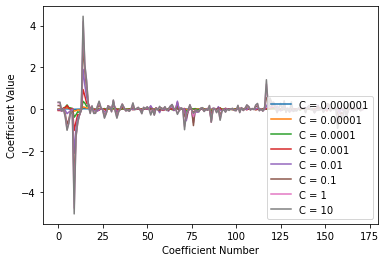

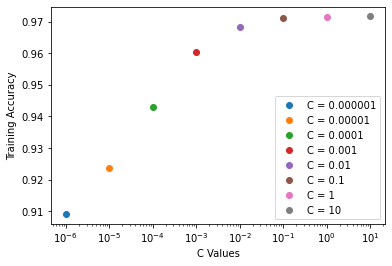

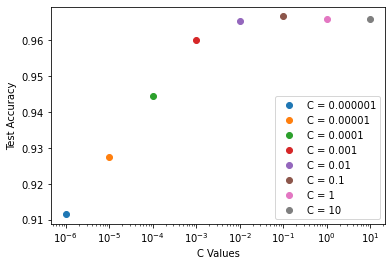

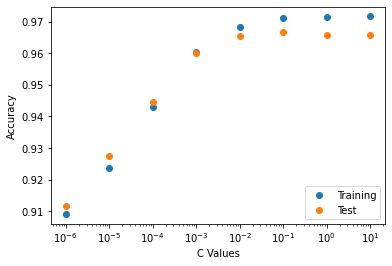

In [14]:
acc_logreg_polyDeg2_train_l2 = []
acc_logreg_polyDeg2_test_l2 = []

logreg_model_l2(c_vals, X_transformed_train, y_2d_train.ravel(), X_transformed_test, y_2d_test.ravel(), acc_logreg_polyDeg2_train_l2, acc_logreg_polyDeg2_test_l2)

# Separate test/train accuracy plots
for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_polyDeg2_train_l2[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Training Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_polyDeg2_test_l2[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

# Combined test/train accuracy plots
plt.plot(c_vals, acc_logreg_polyDeg2_train_l2, 'o')

plt.plot(c_vals, acc_logreg_polyDeg2_test_l2, 'o')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()

### Logistic Regression with Random State 30 and L1 Regularization

Use a different random state (30) to split the data.  
Perform logistic regression using sklearn's library with L1 regularization.

C value = 0.000001
Accuracy on training data = 0.505891
Accuracy on test data = 0.508118


C value = 0.000010
Accuracy on training data = 0.505891
Accuracy on test data = 0.508118


C value = 0.000100
Accuracy on training data = 0.956703
Accuracy on test data = 0.960227


C value = 0.001000
Accuracy on training data = 0.957014
Accuracy on test data = 0.956731


C value = 0.010000
Accuracy on training data = 0.959681
Accuracy on test data = 0.960071


C value = 0.100000
Accuracy on training data = 0.960639
Accuracy on test data = 0.960848


C value = 1.000000
Accuracy on training data = 0.961157
Accuracy on test data = 0.961625


C value = 10.000000
Accuracy on training data = 0.961157
Accuracy on test data = 0.961625




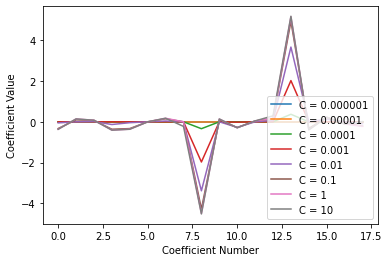

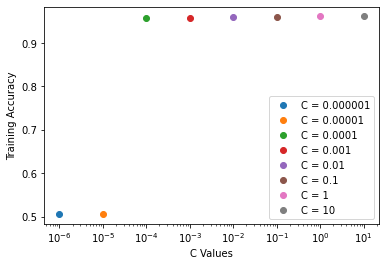

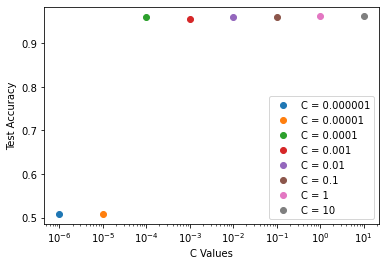

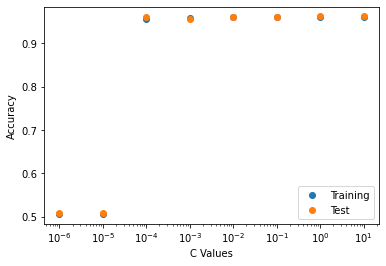

In [16]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(lol_X_scale, lol_Y, test_size = 0.25, train_size = 0.75, random_state = 30)
y_2d_train_2 = y_train_2.reshape(y_train_2.shape[0], 1)
y_2d_test_2 = y_test_2.reshape(y_test_2.shape[0], 1)

acc_logreg_train_vals_2 = []
acc_logreg_test_vals_2 = []
    
logreg_model_l1(c_vals, X_train_2, y_2d_train_2.ravel(), X_test_2, y_2d_test_2.ravel(), acc_logreg_train_vals_2, acc_logreg_test_vals_2)

# Separate test/train accuracy plots
for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_train_vals_2[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Training Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

for i in range(len(c_vals)):
    plt.plot(c_vals[i], acc_logreg_test_vals_2[i], 'o')
plt.xlabel('C Values')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend(['C = 0.000001', 'C = 0.00001', 'C = 0.0001', 'C = 0.001', 'C = 0.01', 'C = 0.1', 'C = 1', 'C = 10'], loc='lower right')
plt.show()

# Combined test/train accuracy plots
plt.plot(c_vals, acc_logreg_train_vals_2, 'o')

plt.plot(c_vals, acc_logreg_test_vals_2, 'o')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend(['Training', 'Test'], loc='lower right')
plt.show()